In [2]:
import pandas as pd
import numpy as np

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical

import os
import re


In [3]:
data1 = 'D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutAIC/data/data1/audio_speech_actors_01-24'
data2 = 'D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutAIC/data/data2/AudioWAV'
data3 = 'D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutAIC/data/data3/TESS Toronto emotional speech set data'
data4 = 'D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutAIC/data/data4/ALL'

In [4]:
data1_dirlist = os.listdir(data1)

file_emotion = []
file_path = []
for dir in data1_dirlist:
    actors = os.listdir(os.path.join(data1, dir))
    for actor in actors:
        part = actor.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(data1 + dir + '/' + actor)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

path_df = pd.DataFrame(file_path, columns=['Path'])
data1_df = pd.concat([emotion_df, path_df], axis=1)

data1_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
data1_df.head()

,Emotions,Path
0,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
1,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
2,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
3,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
4,calm,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...


In [5]:
data2_dirlist = os.listdir(data2)

file_emotion = []
file_path = []

for dir in data2_dirlist:
    file_path.append(data2 + dir)
    part = dir.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

data2_df = pd.concat([emotion_df, path_df], axis=1)
data2_df.head()

,Emotions,Path
0,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
1,disgust,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
2,fear,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
3,happy,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
4,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...


In [6]:
data3_dirlist = os.listdir(data3)

file_emotion = []
file_path = []

for data in data3_dirlist:
    directories = os.listdir(os.path.join(data3, data))
    for dir in directories:
        part = dir.split('.')[0]
        part = part.split('_')[2]
        if part == 'ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(data3 + data + '/' + dir)

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

data3_df = pd.concat([emotion_df, path_df], axis=1)

data3_df.head()

,Emotions,Path
0,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
1,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
2,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
3,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
4,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...


In [7]:
data4_dirlist = os.listdir(data4)

file_emotion = []
file_path =[]

for data in data4_dirlist:
    file_path.append(data4 + data)
    part = data.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
path_df = pd.DataFrame(file_path, columns=['Path'])

data4_df = pd.concat([emotion_df, path_df], axis=1)

data4_df.head()

,Emotions,Path
0,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
1,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
2,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
3,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
4,angry,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...


In [8]:
data_path = pd.concat([data1_df, data2_df, data3_df, data4_df], axis=0)
data_path.to_csv('data_path.csv',  index=False)
data_path.head()

,Emotions,Path
0,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
1,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
2,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
3,neutral,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...
4,calm,D:/KAMPUS/UGM/Perlombaan/compfest 2024/ngebutA...


c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ryan\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


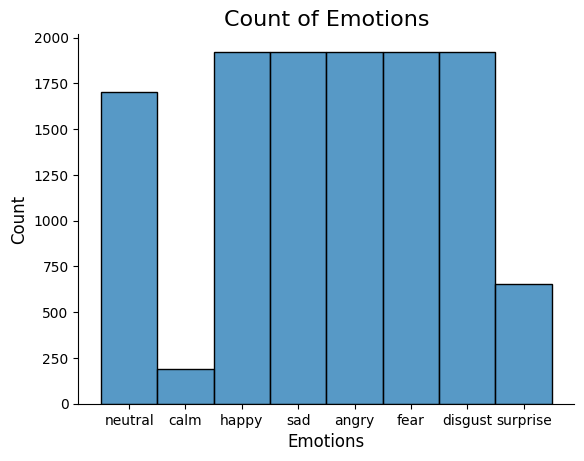

In [9]:
plt.title('Count of Emotions', size=16)
sns.histplot(data=data_path, x='Emotions')
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [10]:
def waveplot(data, sr, emo):
    plt.figure(figsize=(10,3))
    plt.title(f'Waveplot for Audio with {emo} emotion', size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emo):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(12,3))
    plt.title(f'Spectogram for Audio with {emo} emotion', size=15)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

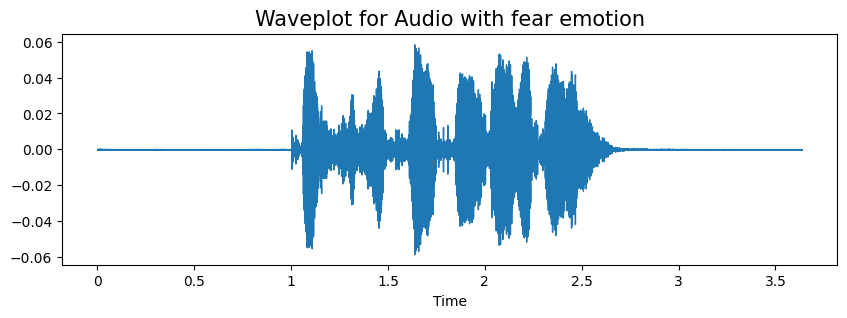

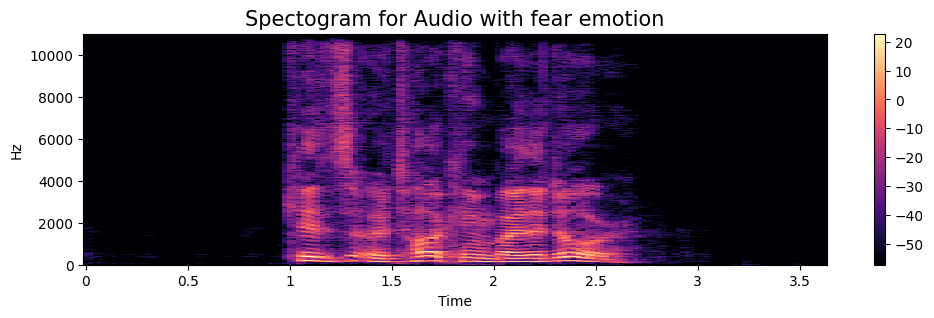

In [11]:
emotion = 'fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
corrected_path = re.sub(r'(\d{2})(Actor)', r'\1/\2', path)
data, sampling_rate = librosa.load(corrected_path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(corrected_path)

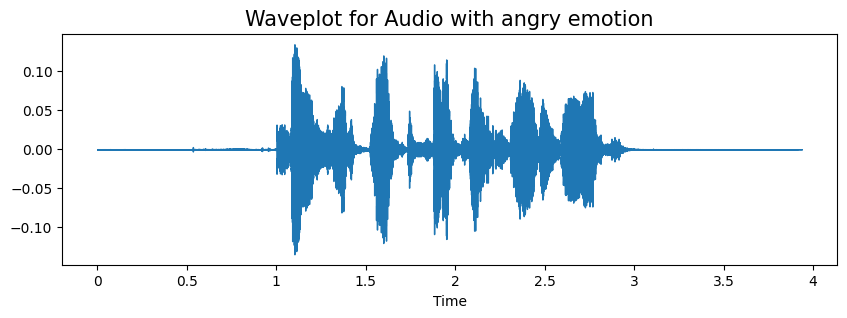

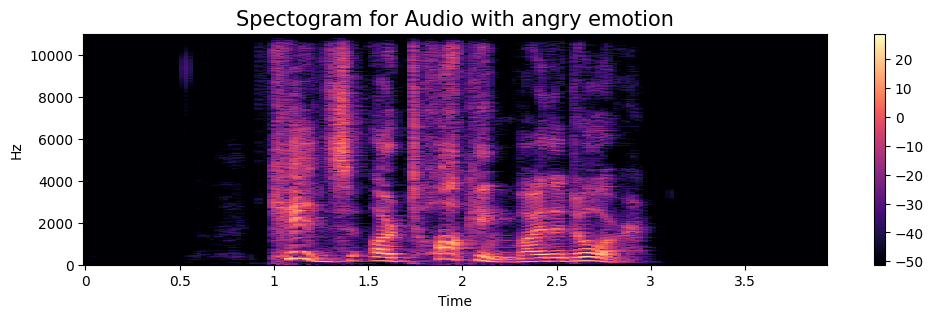

In [12]:
emotion = 'angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
corrected_path = re.sub(r'(\d{2})(Actor)', r'\1/\2', path)
data, sampling_rate = librosa.load(corrected_path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(corrected_path)

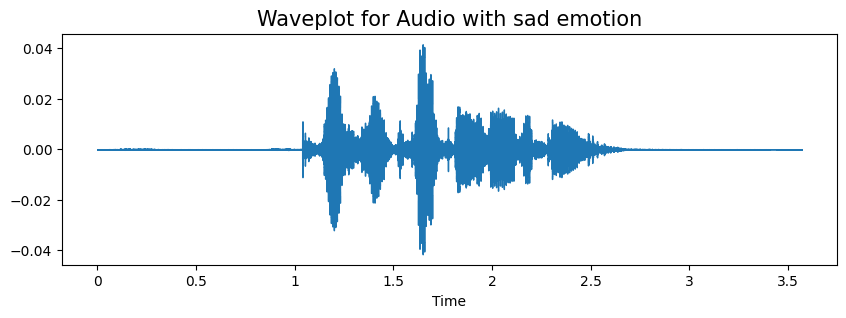

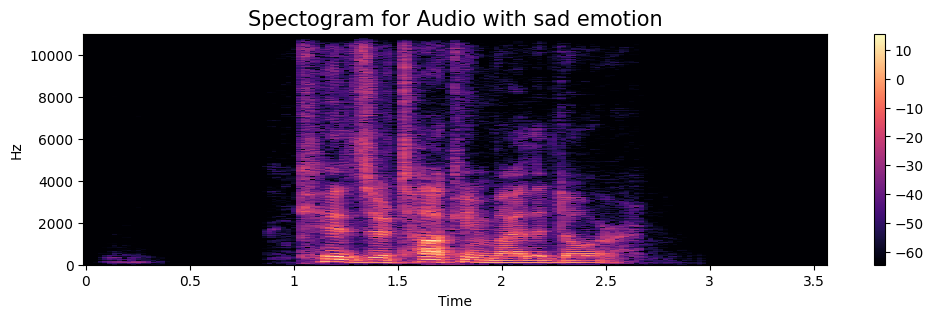

In [13]:
emotion = 'sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
corrected_path = re.sub(r'(\d{2})(Actor)', r'\1/\2', path)
data, sampling_rate = librosa.load(corrected_path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(corrected_path)

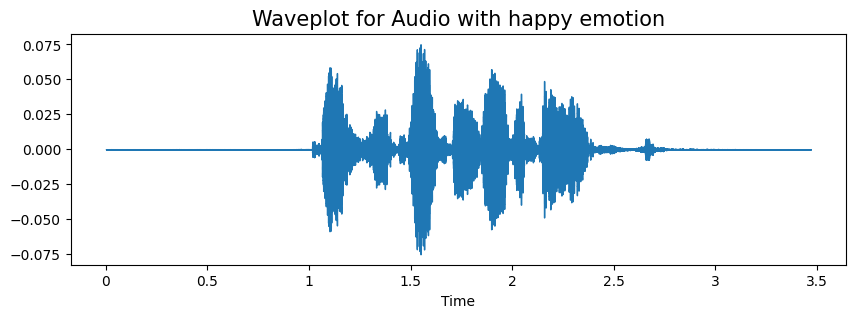

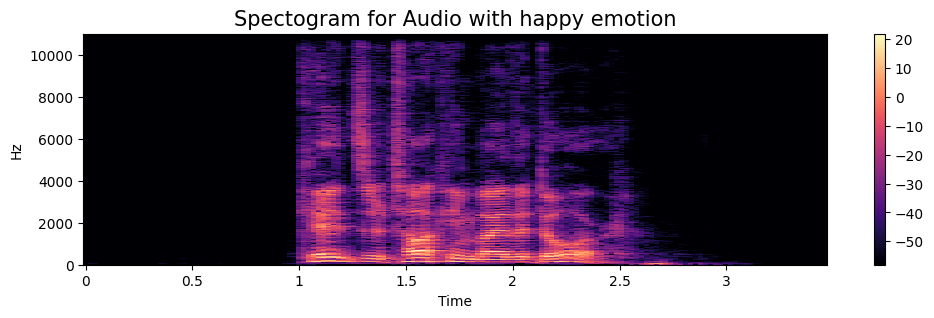

In [14]:
emotion = 'happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
corrected_path = re.sub(r'(\d{2})(Actor)', r'\1/\2', path)
data, sampling_rate = librosa.load(corrected_path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(corrected_path)

In [15]:
def noise(data):
    noise_amp = 0.04 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.9):
    return librosa.effects.time_stretch(y=data, rate=rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-7, high=7) * 1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.75):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

path = np.array(data_path.Path)[1]
corrected_path = re.sub(r'(\d{2})(Actor)', r'\1/\2', path)
data, sample_rate = librosa.load(corrected_path)

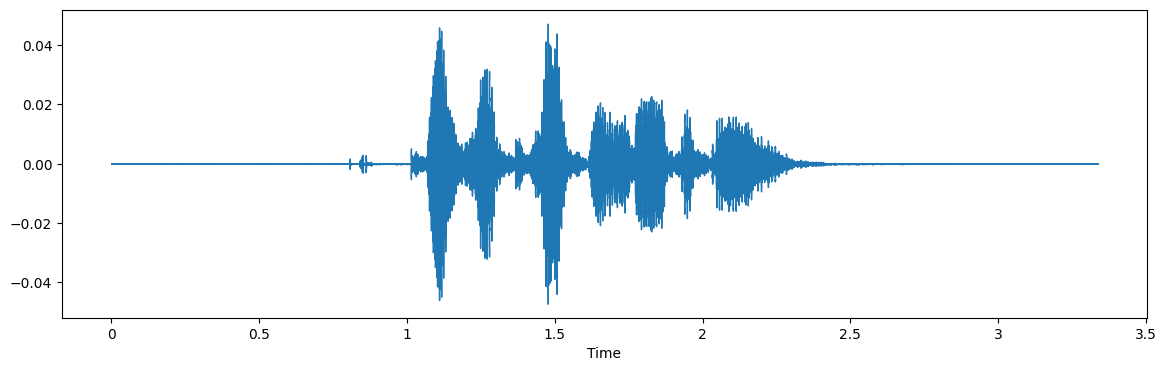

In [17]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(corrected_path)

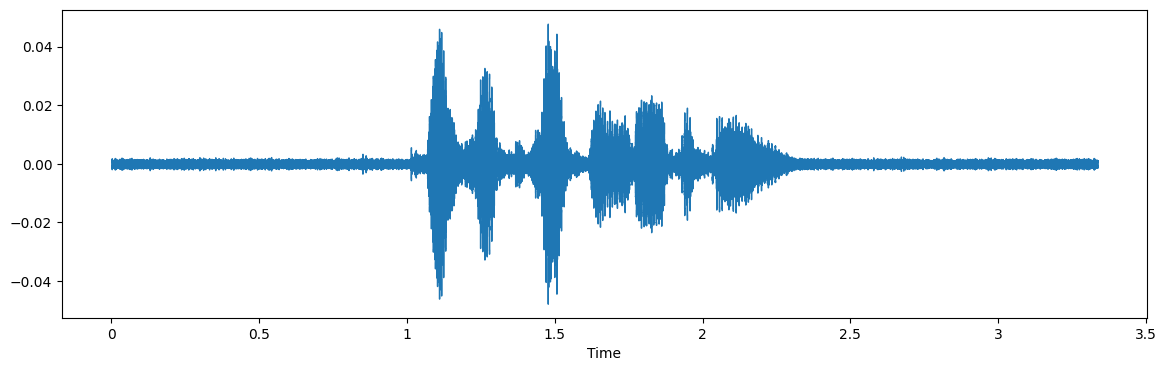

In [21]:
noiseData = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=noiseData, sr=sample_rate)
Audio(noiseData, rate=sample_rate)

In [ ]:
stretchData = stretch(data, rate=0.85)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=stretchData, sr=sample_rate)
Audio(stretchData, rate=sample_rate)